In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/reference_html_as_sentences_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reference_id           676 non-null    object 
 1   reference_property_id  676 non-null    object 
 2   reference_datatype     676 non-null    object 
 3   url                    676 non-null    object 
 4   netloc                 676 non-null    object 
 5   netloc_agg             676 non-null    object 
 6   error_msg              676 non-null    object 
 7   code                   676 non-null    int64  
 8   content-type           676 non-null    object 
 9   final_url              676 non-null    object 
 10  reason                 662 non-null    object 
 11  language_crawl         676 non-null    object 
 12  language_crawl_score   676 non-null    float64
 13  sampling_weight_vb     676 non-null    object 
 14  sampling_weight        676 non-null    float64
 15  html  

In [4]:
df[df.url != df.final_url]

,reference_id,reference_property_id,reference_datatype,url,netloc,netloc_agg,error_msg,code,content-type,final_url,reason,language_crawl,language_crawl_score,sampling_weight_vb,sampling_weight,html,extracted_sentences,extracted_text,nlp_sentences,nlp_sentences_slide_2
9,2ecb2518bc116ca7cb6b48a2a949f1343d1a3808,P4656,url,https://en.wikipedia.org/w/index.php?title=201...,en.wikipedia.org,en.wikipedia.org,none,200,text/html; charset=UTF-8,https://en.wikipedia.org/w/index.php?title=201...,OK,en,0.578630,321744|13,24749.538462,"<html class=""client-js ve-available"" lang=""en""...","['2016–17 Alpe Adria Cup.', 'From Wikipedia, t...","2016–17 Alpe Adria Cup. From Wikipedia, the fr...","['2016–17', 'Alpe Adria Cup.', 'From Wikipedia...","['2016–17 Alpe Adria Cup.', 'Alpe Adria Cup. F..."
12,fa3dbf3fc3baa365e9b90114a310f42b757d2809,P4656,url,https://en.wikipedia.org/w/index.php?title=201...,en.wikipedia.org,en.wikipedia.org,none,200,text/html; charset=UTF-8,https://en.wikipedia.org/w/index.php?title=201...,OK,en,0.408684,321744|13,24749.538462,"<html class=""client-js ve-available"" lang=""en""...","['2016–17 Polish Cup.', 'From Wikipedia, the f...","2016–17 Polish Cup. From Wikipedia, the free e...","['2016–17 Polish Cup.', 'From Wikipedia, the f...","['2016–17 Polish Cup. From Wikipedia, the free..."
39,caa40aeb032f765464c7a4f5bc64278809604500,P854,url,http://pid.emory.edu/ark:/25593/8xxdk,pid.emory.edu,OTHER,none,200,text/html; charset=utf-8,https://findingaids.library.emory.edu/document...,OK,en,0.945792,21929|13,1686.846154,"<html xmlns=""http://www.w3.org/1999/xhtml"" xml...","['Woodruff.', 'Business.', 'Health Sciences.',...",Woodruff. Business. Health Sciences. Law. MARB...,"['Woodruff.', 'Business.', 'Health Sciences.',...","['Woodruff. Business.', 'Business. Health Scie..."
40,4700b12b991c2bf798d3ee862b96f5bfcb7d0e54,P854,url,http://art.seattleartmuseum.org/objects/19751/...,art.seattleartmuseum.org,OTHER,none,200,text/html;charset=UTF-8,https://art.seattleartmuseum.org/objects/19751...,OK,en,0.876761,21929|13,1686.846154,"<html data-debug-enabled=""true"" data-locale=""e...","['Turn on more accessible mode.', 'Turn off mo...",Turn on more accessible mode. Turn off more ac...,"['Turn on more accessible mode.', 'Turn off mo...",['Turn on more accessible mode. Turn off more ...
44,c7979b6682e7e0701e57657323a7cd9b38ae5ec1,P854,url,http://www.nndb.com/people/338/000100038/,www.nndb.com,OTHER,none,200,text/html,https://www.nndb.com/people/338/000100038/,OK,en,0.862544,21929|13,1686.846154,<html><head>\n<title>Richard Zsigmondy</title>...,"['This is a beta version of NNDB.', 'Search:',...",This is a beta version of NNDB. Search: All Na...,"['This is a beta version of NNDB.', 'Search: A...",['This is a beta version of NNDB. Search: All ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,1b6a1b968aab67dece0c691a585314d840b48789,P854,url,http://www.bbc.co.uk/sport/0/horse-racing/1745...,www.bbc.co.uk,www.bbc.co.uk,none,200,text/html;charset=utf-8,https://www.bbc.co.uk/sport/horse-racing/17453652,OK,en,0.976408,631|13,48.538462,"<html lang=""en-GB"" class=""b-reith-sans-font no...","[""We've updated our Privacy and Cookies Policy...",We've updated our Privacy and Cookies Policy. ...,"[""We've updated our Privacy and Cookies Policy...","[""We've updated our Privacy and Cookies Policy..."
632,3d52abad237d6e8fa4811ec1053ef3d82550d756,P854,url,http://www.bbc.co.uk/newsbeat/article/39588864...,www.bbc.co.uk,www.bbc.co.uk,none,200,text/html,https://www.bbc.co.uk/news/newsbeat-39588864,OK,en,0.976829,631|13,48.538462,"<html lang=""en-GB"" class=""""><head><meta charse...",['Let us know you agree to cookies We use cook...,Let us know you agree to cookies We use cookie...,['Let us know you agree to cookies We use cook...,['Let us know you agree to cookies We use cook...
634,0d598fa5325b4fdc093ee0bbaf05dc90bb34c012,P854,url,http://www.bbc.co.uk/rd/blog/2016/10/alliance-...,www.bbc.co.uk,www.bbc.co.uk,none

In [5]:
bad_netloc_aggs = [
    'witches.shca.ed.ac.uk', #Single infobox
    'en.isabart.org', #Single infobox
    'bechdeltest.com', #HAS API
    'npg.si.edu', #Image and single infobox
    'www.guidetopharmacology.org', #Single infobox
    'letterboxd.com', #Single infobox and has API
    'www.discogs.com', #Single infobox
    'vocab.getty.edu', #HAS JSON DUMPS
    'www.isfdb.org', #single infobox
    'www.npg.org.uk', #set of infoboxes
    'art.nationalgalleries.org', #image and single infobox
    'www.tate.org.uk', #image and single infobox
    'www.getty.edu', #HAS JSON DUMPS
    'memory-beta.fandom.com', #The portion with the information on Claims is just a long list of names and links
    'www.disease-ontology.org', #A single infobox
    'artgallery.yale.edu', #Image and a single infobox
    'www.imdb.com', #These are author pages and consist of a portrait, an infobox, and lists of movies
    'muckrack.com', #A very short infobox
    'live.dbpedia.org', #It's dbpedia, so it's mainly a huge infobox and there are dumps
    'dbpedia.org' #Same as above
]
df = df[~df.netloc_agg.isin(bad_netloc_aggs)].reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reference_id           416 non-null    object 
 1   reference_property_id  416 non-null    object 
 2   reference_datatype     416 non-null    object 
 3   url                    416 non-null    object 
 4   netloc                 416 non-null    object 
 5   netloc_agg             416 non-null    object 
 6   error_msg              416 non-null    object 
 7   code                   416 non-null    int64  
 8   content-type           416 non-null    object 
 9   final_url              416 non-null    object 
 10  reason                 415 non-null    object 
 11  language_crawl         416 non-null    object 
 12  language_crawl_score   416 non-null    float64
 13  sampling_weight_vb     416 non-null    object 
 14  sampling_weight        416 non-null    float64
 15  html  

In [6]:
df.reference_id.unique().shape[0]

416

<AxesSubplot:xlabel='count', ylabel='netloc_agg'>

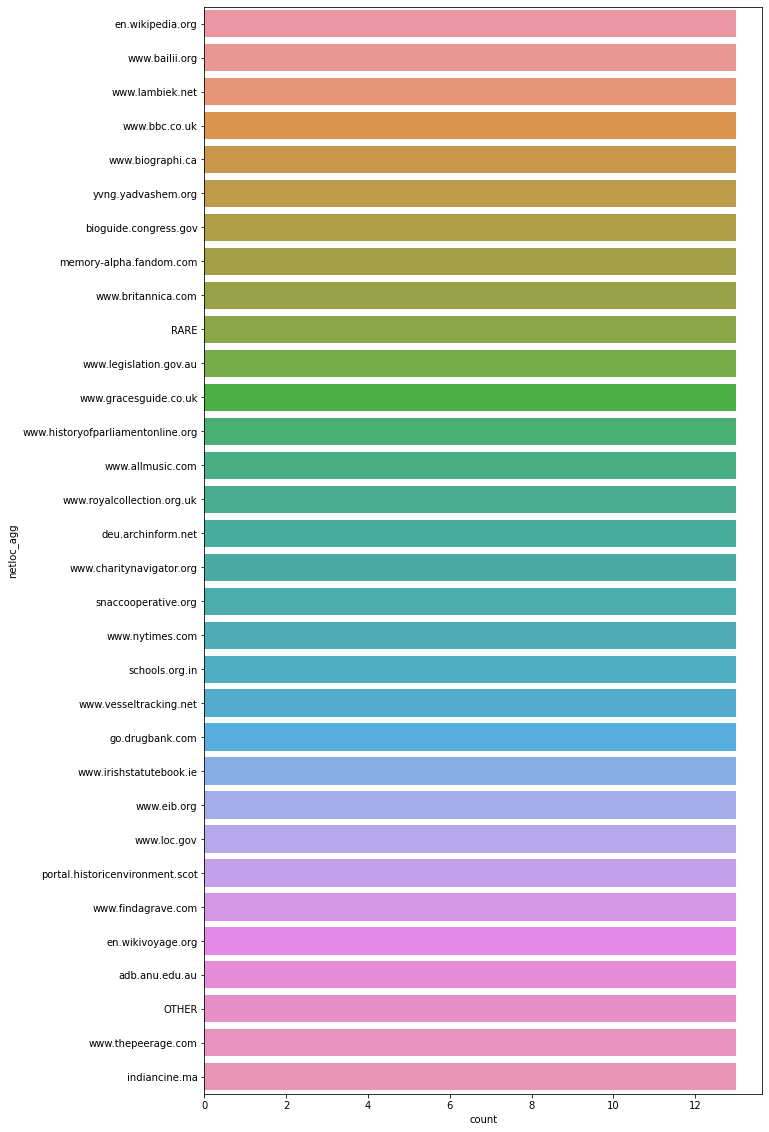

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,20))

sns.countplot(
    data = df,
    y='netloc_agg',
    orient='h',
    order=df.netloc_agg.value_counts().index,
)

In [19]:
from ast import literal_eval as leval

df['extracted_sentences_n'] = df.extracted_sentences.apply(lambda x : len(leval(x)))

In [26]:
df.extracted_sentences_n.sum(),\
df.extracted_sentences_n.describe()

(63900,
 count     416.000000
 mean      153.605769
 std       190.288350
 min         1.000000
 25%        51.750000
 50%        88.500000
 75%       167.750000
 max      1345.000000
 Name: extracted_sentences_n, dtype: float64)

In [58]:
df['mean_extracted_sentence_len'] = df.extracted_sentences.apply(
    lambda x : np.mean([len(s) for s in leval(x)])
)

In [48]:
df[df['netloc_agg'] == 'bioguide.congress.gov'].iloc[0].extracted_sentences

'["Back Download { JSON } <XML> HOGAN, Lawrence Joseph 1928 – 2017 Overview Biography Congresses Bibliography Research Collections Collection of the U.S. House of Representatives 3\\xa0 US Congresses Served 91st – 93rd (1969 – 1975) House Years of Service 1969 – 1975 State / Territory Maryland Position Representative Party Republican Overview 3\\xa0 US Congresses Served 91st – 93rd (1969 – 1975) House Years of Service 1969 – 1975 State / Territory Maryland Position Representative Party Republican Biography HOGAN, Lawrence Joseph,\\xa0 a Representative from Maryland; born in Boston, Suffolk County, Mass., September 30, 1928; graduated from Gonzaga High School, Washington, D.C., 1946; B.A., Georgetown University, Washington, D.C., 1949; J.D., Georgetown University, Washington, D.C., 1954; M.A., American University, Washington, D.C., 1965; graduate work San Francisco State College, 1956-1957, and University of Maryland, 1966-1967; admitted to the bar in 1954 and commenced practice in Wash

In [56]:
df.groupby('netloc_agg').extracted_sentences_n.agg(['mean','std'])#['std'].median()

,mean,std
netloc_agg,,
OTHER,115.615385,134.246377
RARE,159.615385,156.679364
adb.anu.edu.au,69.153846,7.861787
bioguide.congress.gov,1.000000,0.000000
deu.archinform.net,63.692308,23.739505
en.wikipedia.org,324.307692,362.124146
en.wikivoyage.org,237.923077,133.002795
go.drugbank.com,92.923077,40.711304
indiancine.ma,25.538462,39.076027


<AxesSubplot:xlabel='extracted_sentences_n', ylabel='netloc_agg'>

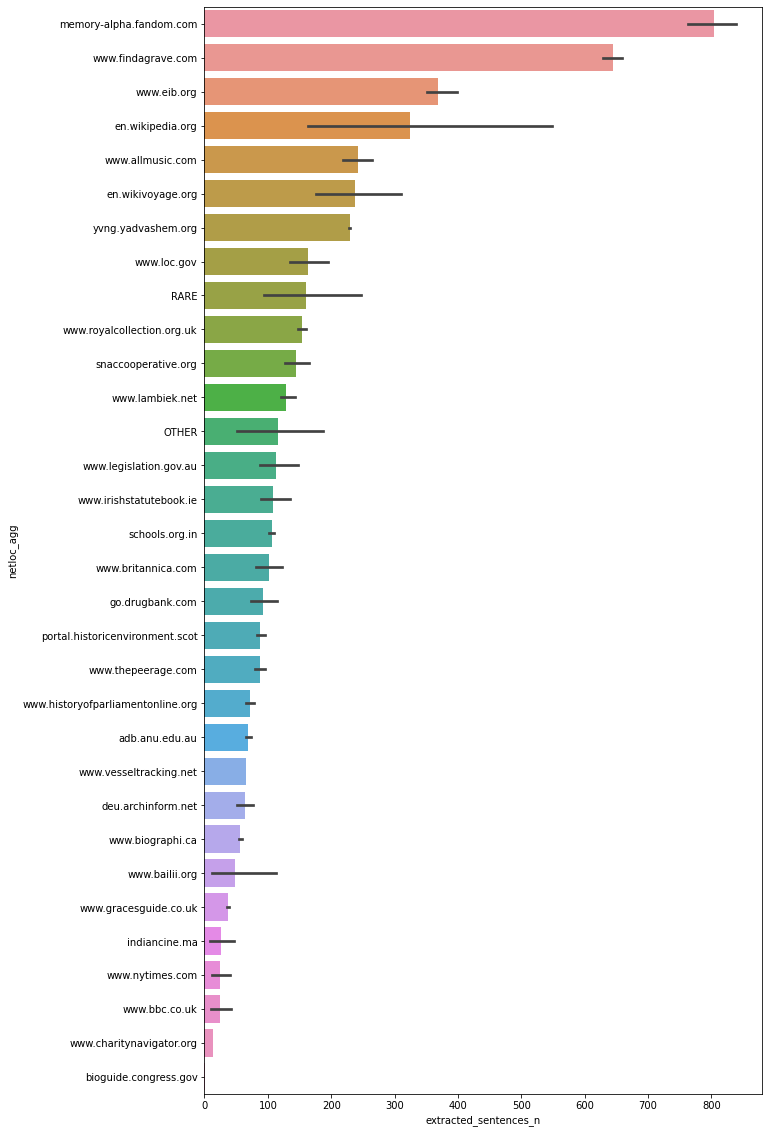

In [45]:
fig, ax = plt.subplots(1,1,figsize=(10,20))

sns.barplot(
    data = df,
    y='netloc_agg',
    x='extracted_sentences_n',
    orient='h',
    order=df.groupby('netloc_agg').mean().extracted_sentences_n.sort_values(ascending=False).index,
)

In [64]:
df.groupby('netloc_agg').mean_extracted_sentence_len.agg(['mean','std']).sort_values('mean')#['std'].median()

,mean,std
netloc_agg,,
www.allmusic.com,24.207929,13.349603
www.eib.org,26.729635,1.851728
www.royalcollection.org.uk,27.976970,4.495261
yvng.yadvashem.org,30.678361,0.573421
www.findagrave.com,31.705745,2.642157
www.lambiek.net,32.177089,47.514774
snaccooperative.org,34.908926,5.204903
www.vesseltracking.net,36.298225,0.730500
schools.org.in,37.920182,3.022203


<AxesSubplot:xlabel='mean_extracted_sentence_len', ylabel='netloc_agg'>

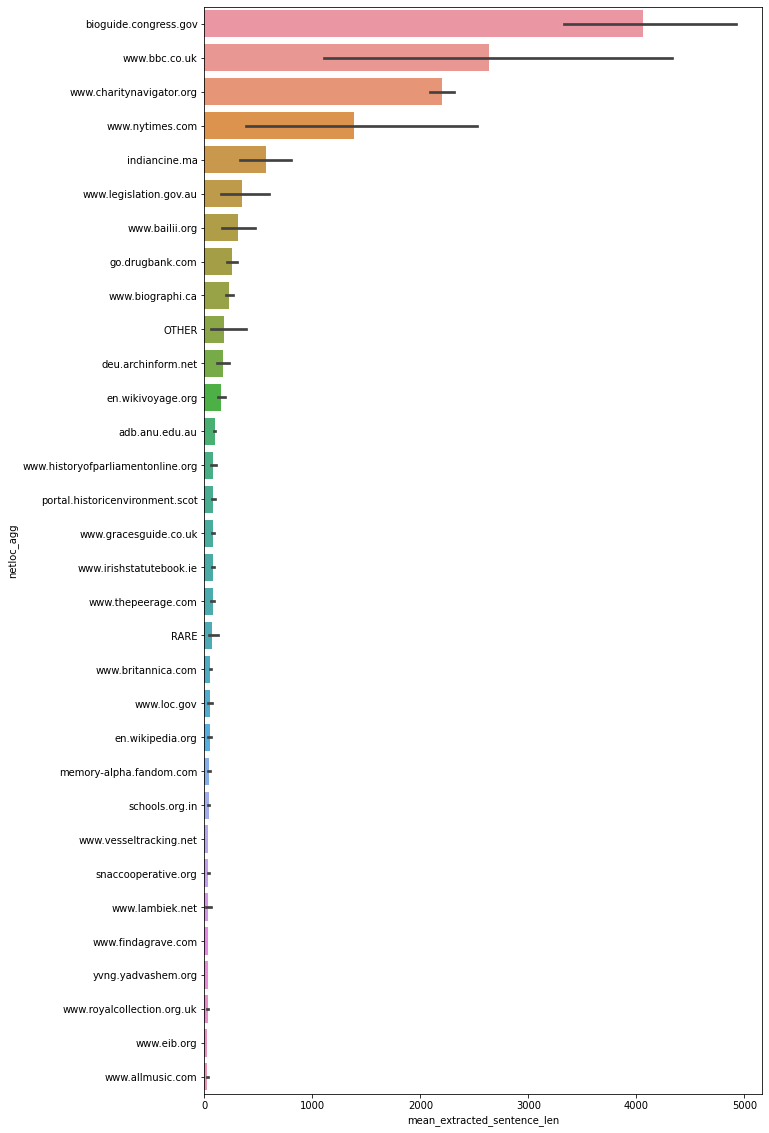

In [60]:
fig, ax = plt.subplots(1,1,figsize=(10,20))

sns.barplot(
    data = df,
    y='netloc_agg',
    x='mean_extracted_sentence_len',
    orient='h',
    order=df.groupby('netloc_agg').mean().mean_extracted_sentence_len.sort_values(ascending=False).index,
)

In [65]:
df.corr()

,code,language_crawl_score,sampling_weight,extracted_sentences_n,mean_extracted_sentence_len
code,1.000000,-0.092132,-0.031712,-0.084968,-0.041115
language_crawl_score,-0.092132,1.000000,-0.046415,0.032196,-0.035660
sampling_weight,-0.031712,-0.046415,1.000000,0.119171,-0.089220
extracted_sentences_n,-0.084968,0.032196,0.119171,1.000000,-0.251349
mean_extracted_sentence_len,-0.041115,-0.035660,-0.089220,-0.251349,1.000000


,reference_id,reference_property_id,url,netloc,netloc_agg,error_msg,code,content-type,final_url,reason,...,language_crawl_score,sampling_weight_vb,sampling_weight,html,extracted_sentences,extracted_text,nlp_sentences,nlp_sentences_slide_2,extracted_sentences_n,mean_extracted_sentence_len
reference_datatype,,,,,,,,,,,,,,,,,,,,,
external-id,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,...,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885,0.427885
url,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115,0.569712,...,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115,0.572115


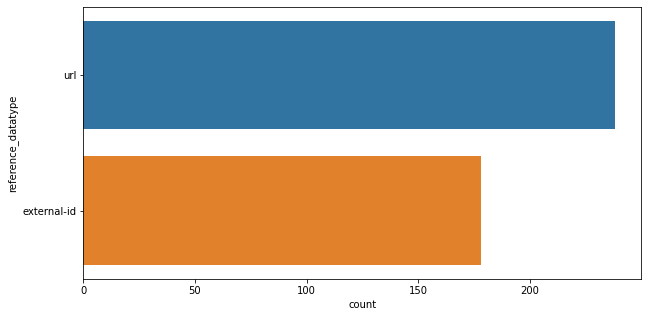

In [70]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.countplot(
    data = df,
    y='reference_datatype',
    orient='h',
    order=df['reference_datatype'].value_counts().index,
)

df.groupby('reference_datatype').count()/df.shape[0]

<AxesSubplot:xlabel='count', ylabel='content-type'>

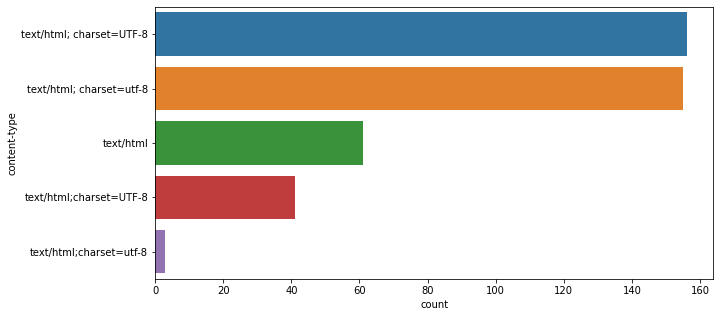

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.countplot(
    data = df,
    y='content-type',
    orient='h',
    order=df['content-type'].value_counts().index,
)